In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import spectral_analysis as sa
import scipy.interpolate as inter
from scipy.special import erf

## Load comparison templates

In [3]:
phase_h, wavelength_hsiao, flux_hsiao = np.loadtxt('../data/info_files/hsiao_template.dat', unpack = True)

In [4]:
epoch_n, wavelength_nugent, flux_nugent = np.loadtxt('../data/info_files/nugent_templates.dat', unpack = True)
epoch_n_91t, wavelength_nugent_91t, flux_nugent_91t = np.loadtxt('../data/info_files/nugent_91t_templates.dat', unpack = True)
epoch_n_91bg, wavelength_nugent_91bg, flux_nugent_91bg = np.loadtxt('../data/info_files/nugent_91bg_templates.dat', unpack = True)

In [5]:
phase_s, wavelength_salt, flux_salt = np.loadtxt('../data/info_files/SALT/salt2-4/salt2_template_0.dat', unpack = True)

In [6]:
t_h, U_h, B_h, V_h, R_h, I_h, Y_h, J_h, H_h, K_h = np.loadtxt('../data/info_files/hsiao_lc_template.dat', unpack = True)

In [7]:
t_n, U_n, B_n, V_n, R_n, I_n, J_n, H_n, K_n = np.loadtxt('../data/info_files/nugent_light_curves.dat', unpack = True)

In [8]:
hsiao_temps = {}
phase_list = []
first = True
for i, phase in enumerate(phase_h):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            hsiao_temps[float(phase_h[i-1])] = [temp_wave, temp_flux]
        temp_wave = [wavelength_hsiao[i]]
        temp_flux = [flux_hsiao[i]]
    else:
        temp_wave.append(wavelength_hsiao[i])
        temp_flux.append(flux_hsiao[i])
    first = False

In [9]:
nug_temps = {}
phase_list = []
first = True
for i, phase in enumerate(epoch_n):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            nug_temps[float(epoch_n[i-1]) - 20.] = [temp_wave, temp_flux]
        temp_wave = [wavelength_nugent[i]]
        temp_flux = [flux_nugent[i]]
    else:
        temp_wave.append(wavelength_nugent[i])
        temp_flux.append(flux_nugent[i])
    first = False

nug_temps_91t = {}
phase_list = []
first = True
for i, phase in enumerate(epoch_n_91t):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            nug_temps_91t[float(epoch_n_91t[i-1]) - 20.] = [temp_wave, temp_flux]
        temp_wave = [wavelength_nugent_91t[i]]
        temp_flux = [flux_nugent_91t[i]]
    else:
        temp_wave.append(wavelength_nugent_91t[i])
        temp_flux.append(flux_nugent_91t[i])
    first = False
    
nug_temps_91bg = {}
phase_list = []
first = True
for i, phase in enumerate(epoch_n_91bg):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            nug_temps_91bg[float(epoch_n_91bg[i-1]) - 20.] = [temp_wave, temp_flux]
        temp_wave = [wavelength_nugent_91bg[i]]
        temp_flux = [flux_nugent_91bg[i]]
    else:
        temp_wave.append(wavelength_nugent_91bg[i])
        temp_flux.append(flux_nugent_91bg[i])
    first = False

In [10]:
salt_temps = {}
phase_list = []
first = True
for i, phase in enumerate(phase_s):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            salt_temps[float(phase_s[i-1])] = [temp_wave, temp_flux]
        temp_wave = [wavelength_salt[i]]
        temp_flux = [flux_salt[i]]
    else:
        temp_wave.append(wavelength_salt[i])
        temp_flux.append(flux_salt[i])
    first = False

## Interpolate templates

In [11]:
wave_h = hsiao_temps[0.][0]
flux_h = hsiao_temps[0.][1]

In [12]:
wave_interp_h = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h = inter.splrep(wave_h, flux_h)
flux_interp_h = inter.splev(wave_interp_h, flux_spl_h, ext = 3)
h_template = composite.supernova(wave_interp_h, flux_interp_h)
h_template.phase_array = np.zeros(len(flux_interp_h))

In [13]:
wave_n = nug_temps[0.][0]
flux_n = nug_temps[0.][1]

wave_n_91t = nug_temps_91t[0.][0]
flux_n_91t = nug_temps_91t[0.][1]

wave_n_91bg = nug_temps_91bg[0.][0]
flux_n_91bg = nug_temps_91bg[0.][1]

In [14]:
wave_interp_n = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n = inter.splrep(wave_n, flux_n)
flux_interp_n = inter.splev(wave_interp_n, flux_spl_n, ext = 3)
n_template = composite.supernova(wave_interp_n,flux_interp_n)
n_template.phase_array = np.zeros(len(flux_interp_n))

wave_interp_n_91t = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_91t = inter.splrep(wave_n_91t, flux_n_91t)
flux_interp_n_91t = inter.splev(wave_interp_n_91t, flux_spl_n_91t, ext = 3)
n_template_91t = composite.supernova(wave_interp_n_91t,flux_interp_n_91t)
n_template_91t.phase_array = np.zeros(len(flux_interp_n_91t))

wave_interp_n_91bg = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_91bg = inter.splrep(wave_n_91bg, flux_n_91bg)
flux_interp_n_91bg = inter.splev(wave_interp_n_91bg, flux_spl_n_91bg, ext = 3)
n_template_91bg = composite.supernova(wave_interp_n_91bg,flux_interp_n_91bg)
n_template_91bg.phase_array = np.zeros(len(flux_interp_n_91bg))

In [15]:
wave_s = salt_temps[0.][0]
flux_s = salt_temps[0.][1]

In [16]:
wave_interp_s = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s = inter.splrep(wave_s, flux_s)
flux_interp_s = inter.splev(wave_interp_s, flux_spl_s, ext = 3)
s_template = composite.supernova(wave_interp_s, flux_interp_s)
s_template.phase_array = np.zeros(len(flux_interp_s))

## Maximum light - normal Ia composite spectrum

In [17]:
query = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase < 1",
         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source >= 1.02 and dm15_source < 1.24) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.24)) and Supernovae.SN !='2002bf'"]

In [18]:
composites, sn_arrays, boot_sn_arrays = query_db.main(len(query), query, boot='b', medmean=1, gini_balance = True, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase < 1
173 questionable files currently ignored
Generate variance failed for:  [u'sn2004dt-20040820-hst.flm']
(13, 'questionable spectra removed', 199, 'spectra left')
(5, 'Peculiar Ias removed', 194, 'spectra left')
149 spectra with host corrections
173 questionable files currently ignored
99 valid SNe found
Arrays cleaned
3 spectra may have telluric contamination
99 SNs with host corrections
Creating composite...


gini.py:43: RuntimeWarning: invalid value encountered in absolute
  g_diff = np.absolute(g_wi - g_wj)


Gini balancing...
Balanced after 30 iterations
Done.
Bootstrapping


composite.py:1012: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template.RMSE != None:


scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source >= 1.02 and dm15_source < 1.24) or (dm15_from_fits >= 1.02 and dm15_from_fits < 1.24)) and Supernovae.SN !='2002bf'
173 questionable files currently ignored
Generate variance failed for:  [u'sn2004dt-20040820-hst.flm']
(8, 'questionable spectra removed', 65, 'spectra left')
(0, 'Peculiar Ias removed', 65, 'spectra left')
55 spectra with host corrections
173 questionable files currently ignored
35 valid SNe found
Arrays cleaned
2 spectra may have telluric contamination
35 SNs with host corrections
Creating composite...


gini.py:48: RuntimeWarning: invalid value encountered in double_scalars
  gini_coeffs.append(gini_num/gini_denom)


Gini balancing...
Balanced after 12 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...


In [19]:
query_db.set_min_num_spec(composites, 5)

In [20]:
comps_and_temps = []
for comp in composites:
    comps_and_temps.append(comp)
comps_and_temps.append(h_template)
comps_and_temps.append(n_template)
comps_and_temps.append(s_template)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[2], True)

## Generate photometry from template spectra and compare to template light curves

In [21]:
import pyphot

In [22]:
from pyphot.vega import Vega
vega = Vega()
lib = pyphot.get_library()
f = lib['GROUND_JOHNSON_B']
# compute the integrated flux through the filter f
# note that it work on many spectra at once
fluxes = f.get_flux(vega.wavelength, vega.flux, axis=-1)
# convert to vega magnitudes
mags = -2.5 * np.log10(fluxes) - f.Vega_zero_mag
print("Vega magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))
mags = -2.5 * np.log10(fluxes) - f.AB_zero_mag
print("AB magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))
mags = -2.5 * np.log10(fluxes) - f.ST_zero_mag
print("ST magnitude of Vega in {0:s} is : {1:f} mag".format(f.name, mags))

Vega magnitude of Vega in GROUND_JOHNSON_B is : 0.000000 mag
AB magnitude of Vega in GROUND_JOHNSON_B is : -0.074212 mag
ST magnitude of Vega in GROUND_JOHNSON_B is : -0.587021 mag


In [23]:
lib = pyphot.get_library()
B = lib['GROUND_JOHNSON_B']
V = lib['GROUND_JOHNSON_V']
hsiao_fluxB = B.get_flux(comps_and_temps[2].wavelength, comps_and_temps[2].flux, axis = -1)
hsiao_fluxV = V.get_flux(comps_and_temps[2].wavelength, comps_and_temps[2].flux, axis = -1)
hsiao_magB = -2.5 * np.log10(hsiao_fluxB) - B.Vega_zero_mag
hsiao_magV = -2.5 * np.log10(hsiao_fluxV) - V.Vega_zero_mag
print hsiao_magB, hsiao_magV
hsiao_magB = -2.5 * np.log10(hsiao_fluxB) - B.AB_zero_mag
hsiao_magV = -2.5 * np.log10(hsiao_fluxV) - V.AB_zero_mag
print hsiao_magB, hsiao_magV

-0.0387656219521 0.0423946332271
-0.112977534603 0.0345530104216


In [24]:
hsiao_B = []
hsiao_V = []
i=-20.
phases_h = []
while i <= np.amax(hsiao_temps.keys()):
    Bflux = B.get_flux(np.asarray(hsiao_temps[i][0]), np.asarray(hsiao_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(hsiao_temps[i][0]), np.asarray(hsiao_temps[i][1]), axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    hsiao_B.append(Bmag)
    hsiao_V.append(Vmag)
    phases_h.append(i)
    i+=1

In [25]:
nug_B = []
nug_V = []
i=-20.
phases_n = []
while i <= np.amax(nug_temps.keys()):
    Bflux = B.get_flux(np.asarray(nug_temps[i][0]), np.asarray(nug_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(nug_temps[i][0]), np.asarray(nug_temps[i][1]), axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    nug_B.append(Bmag)
    nug_V.append(Vmag)
    phases_n.append(i)
    i+=1

In [26]:
salt_B = []
salt_V = []
i=-20.
phases_s = []
while i <= np.amax(salt_temps.keys()):
    Bflux = B.get_flux(np.asarray(salt_temps[i][0]), np.asarray(salt_temps[i][1]), axis = -1)
    Vflux = V.get_flux(np.asarray(salt_temps[i][0]), np.asarray(salt_temps[i][1]), axis = -1)
#     Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
    Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    salt_B.append(Bmag)
    salt_V.append(Vmag)
    phases_s.append(i)
    i+=1

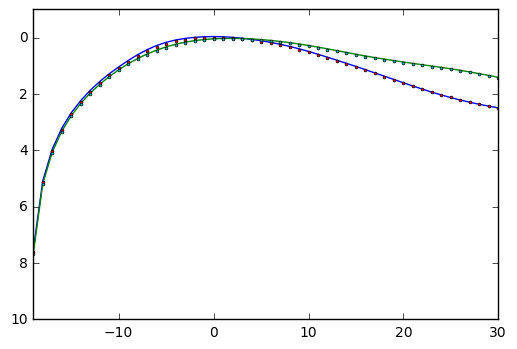

In [27]:
plt.plot(phases_h, hsiao_B)
plt.plot(phases_h, hsiao_V)
plt.plot(t_h, B_h, 'o', markersize=2)
plt.plot(t_h, V_h, 'o', markersize=2)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.ylim([10,-1])
plt.show()

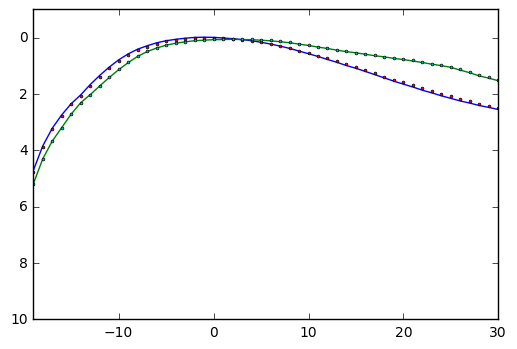

In [28]:
plt.plot(phases_n, nug_B)
plt.plot(phases_n, nug_V)
plt.plot(t_n, B_n, 'o', markersize=2)
plt.plot(t_n, V_n, 'o', markersize=2)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.ylim([10,-1])
plt.show()

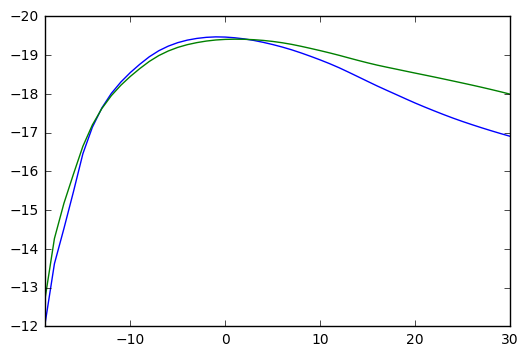

In [29]:
salt_B[0] = np.nan
salt_V[0] = np.nan
plt.plot(phases_s, salt_B)
plt.plot(phases_s, salt_V)
plt.gca().invert_yaxis()
plt.xlim([-19,30])
plt.show()

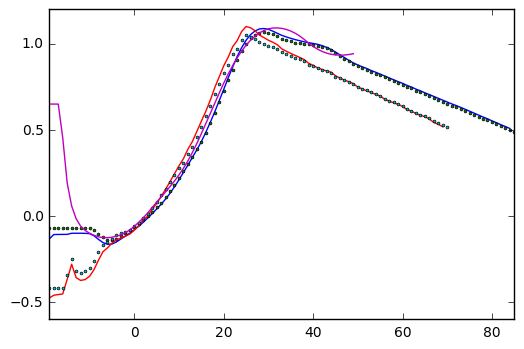

In [30]:
plt.plot(phases_h, np.asarray(hsiao_B)-np.asarray(hsiao_V))
plt.plot(t_h, np.asarray(B_h) - np.asarray(V_h), 'o', markersize=2)
plt.plot(phases_n, np.asarray(nug_B)-np.asarray(nug_V))
plt.plot(t_n, np.asarray(B_n) - np.asarray(V_n), 'o', markersize=2)
plt.plot(phases_s, np.asarray(salt_B)-np.asarray(salt_V))
plt.xlim([-19,85])
plt.show()

## Composite spectral time series for normal - Ias and non dm15 controlled

In [31]:
#changeable phase bin size
query_strings_all = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10."]
max_phase = 60.
p1 = -10.
k = 2.
p2 = p1+k
while p1 < max_phase:
    if p1 > 30.:
        k=7
        p2=p1+4
    query_strings_all.append("SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= %f and phase < %f"% (p1,p2))
    p1 += k
    p2 += k
print query_strings_all

['SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10.', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -10.000000 and phase < -8.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -8.000000 and phase < -6.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -6.000000 and phase < -4.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -4.000000 and phase < -2.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -2.000000 and phase < 0.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 0.000000 and phase < 2.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 2.000000 and phase < 4.000000', 'SELECT

In [32]:
query_strings_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10. and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.25))"]
max_phase = 60.
p1 = -10.
k = 2.
p2 = p1+k
while p1 < max_phase:
    if p1 > 30.:
        k=7
        p2=p1+4
    query_strings_dm15.append("SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= %f and phase < %f and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.25))"% (p1,p2))
    p1 += k
    p2 += k
for q in query_strings_dm15:
    print q

SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10. and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.25))
SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -10.000000 and phase < -8.000000 and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.25))
SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -8.000000 and phase < -6.000000 and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.25))
SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -6.000000 and phase < -4.000000 and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.25))
SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -4.000000 and 

In [33]:
composites_all, sn_arrays_all, boot_sn_arrays_all = query_db.main(len(query_strings_all), query_strings_all, boot='b', medmean=1, gini_balance = True, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10.
ERROR:  2002bo_20020313_3360_7726_00.dat None
ERROR:  sn2006oa-20061116-not.dat None
173 questionable files currently ignored
Generate variance failed for:  [u'2005cf_20050601_3243_9720_00.dat']
(4, 'questionable spectra removed', 87, 'spectra left')
(0, 'Peculiar Ias removed', 87, 'spectra left')
74 spectra with host corrections
173 questionable files currently ignored
32 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
32 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 16 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -10.000000 and phase < -8.000000
ERROR:  2002bo_20020314_0_2_00.dat None
173 questionable files currently ignored
Generate variance failed for:  [u'sn2005cf-20050603-hst.

In [34]:
composites_dm15, sn_arrays_dm15, boot_sn_arrays_dm15 = query_db.main(len(query_strings_dm15), query_strings_dm15, boot='b', medmean=1, gini_balance = True, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10. and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.25))
ERROR:  2002bo_20020313_3360_7726_00.dat None
173 questionable files currently ignored
Generate variance failed for:  [u'2005cf_20050601_3243_9720_00.dat']
(3, 'questionable spectra removed', 38, 'spectra left')
(0, 'Peculiar Ias removed', 38, 'spectra left')
36 spectra with host corrections
173 questionable files currently ignored
11 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
11 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 15 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -10.000000 and phase < -8.000000 and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >=

## Average phases of each composite in time series

In [35]:
comp_phases = []
comp_B = []
comp_V = []
query_db.set_min_num_spec(composites_all, 5)
for comp in composites_all:
    Bflux = B.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Vflux = V.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    comp_B.append(Bmag)
    comp_V.append(Vmag)
    comp_phases.append(np.average(comp.phase_array[comp.x1:comp.x2]))
print comp_phases
print comp_B
print comp_V

[-11.233766306126553, -8.7751388597152982, -7.1085838926518292, -5.0307105931806175, -2.948623817150601, -1.0734937519567178, 0.92780637400252564, 2.9118629500010873, 4.8747332968708372, 6.9196989551461767, 8.9195830071553175, 10.896738218633244, 13.015863904182284, 14.969613420941144, 17.110218692240576, 18.8449404218116, 20.962470862143416, 23.121739753356806, 25.029557363747791, 27.154146715742474, 28.900639459678462, 30.953984526764792, 33.805484211322835, 41.075751047421271, 47.967013121658923, 55.142157817897029]
[-20.044945871752876, -20.038123851082183, -20.047159245367435, -20.053783272778485, -20.051400093993813, -20.066487510399522, -20.060876684730331, -20.097974325569602, -20.084691926490091, -20.188152076711077, -20.082842132234898, -20.015132303195109, -19.964174086844491, -19.892574325067372, -19.82601421127637, -19.764817271337421, -19.746735147129222, -19.737346105939427, -19.648186809931875, -19.606766739435091, -19.512001612788559, -19.513425501909136, -19.567002379

In [36]:
comp_phases_dm15 = []
comp_B_dm15 = []
comp_V_dm15 = []
query_db.set_min_num_spec(composites_dm15, 5)
for comp in composites_dm15:
    Bflux = B.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Vflux = V.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
#     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
#     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
    comp_B_dm15.append(Bmag)
    comp_V_dm15.append(Vmag)
    comp_phases_dm15.append(np.average(comp.phase_array[comp.x1:comp.x2]))
print comp_phases_dm15
print comp_B_dm15
print comp_V_dm15

[-11.56565252894101, -8.6906044666144879, -7.0850008129017867, -4.9241659910306037, -2.8479537935177275, -0.86952092203874487, 0.86602874245221928, 2.6633660243739965, 4.9982939711503214, 6.9636297666827174, 8.8855750207195872, 11.064725367309059, 13.031952834820403, 15.194850215058169, 17.055459754073922, 18.9300779612825, 20.711882817028002, 23.068883885457637, 24.940904741345314, 27.234538097971321, 28.854983197549206, 31.002187791558498, 33.838829173646999, 41.420452468176947, 47.950711060945451, 54.861312733702398]
[-19.992824973421417, -20.011686640218336, -20.000599894269719, -20.015477562011885, -19.9917002160925, -20.033443834407496, -20.01702438698074, -20.084512790295211, -20.075484371393479, -20.07093522200962, -20.047145758388655, -19.992222210704064, -19.92781238061248, -19.845319180232256, -19.815162542252288, -19.715272408213576, -19.671226719288036, -19.741891067007259, -19.72704849704968, -19.515205054391902, -19.493996097345615, -19.529310044567019, -19.6018545157163

## Measure error on composite colors from bootstrapped templates

In [37]:
#bootstrap colors
boot_BmVs = []
for boots in boot_sn_arrays_all:
    boot_B = []
    boot_V = []
    for b in boots:
        Bflux = B.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Vflux = V.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
        Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
    #     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
    #     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
        boot_B.append(Bmag)
        boot_V.append(Vmag)
    BmV = np.asarray(boot_B) - np.asarray(boot_V)
    boot_BmVs.append(BmV)

In [38]:
low_errors = []
up_errors = []
boot_resids = []
percentile = erf(1/np.sqrt(2.))
low_pc = 0.5 - percentile*0.5
up_pc = 0.5 + percentile*0.5
for k in range(len(boot_sn_arrays_all)):
    resids = []
    comp_BmVs = np.asarray(comp_B[k]) - np.asarray(comp_V[k])
    resids.append(boot_BmVs[k] - comp_BmVs)
    resid_sort = np.sort(resids)[0]
    boot_resids.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors.append(np.absolute(resid_sort[low_ind]))
    up_errors.append(resid_sort[up_ind])
errors = [low_errors, up_errors]

In [39]:
#bootstrap colors dm15
boot_BmVs_dm15 = []
for boots in boot_sn_arrays_dm15:
    boot_B = []
    boot_V = []
    for b in boots:
        Bflux = B.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Vflux = V.get_flux(b.wavelength[b.x1:b.x2], b.flux[b.x1:b.x2], axis = -1)
        Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
        Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag
    #     Bmag = -2.5 * np.log10(Bflux) - B.AB_zero_mag
    #     Vmag = -2.5 * np.log10(Vflux) - V.AB_zero_mag
        boot_B.append(Bmag)
        boot_V.append(Vmag)
    BmV = np.asarray(boot_B) - np.asarray(boot_V)
    boot_BmVs_dm15.append(BmV)

In [40]:
low_errors_dm15 = []
up_errors_dm15 = []
boot_resids_dm15 = []
for k in range(len(boot_sn_arrays_dm15)):
    resids = []
    comp_BmVs_dm15 = np.asarray(comp_B_dm15[k]) - np.asarray(comp_V_dm15[k])
    resids.append(boot_BmVs_dm15[k] - comp_BmVs_dm15)
    resid_sort = np.sort(resids)[0]
    boot_resids_dm15.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors_dm15.append(np.absolute(resid_sort[low_ind]))
    up_errors_dm15.append(resid_sort[up_ind])
errors_dm15 = [low_errors_dm15, up_errors_dm15]

In [41]:
dm15s = []
for comp in composites_all:
    dm15s.append(np.average(comp.dm15_array[comp.x1:comp.x2]))
print np.average(dm15s)
dm15s = []
for comp in composites_dm15:
    dm15s.append(np.average(comp.dm15_array[comp.x1:comp.x2]))
print np.average(dm15s)

1.12638200781
1.12190174426


In [42]:
# Comp_BV = [-0.12563546 -0.15561324 -0.14673738 -0.1268233  -0.10699947 -0.08366862
#  -0.03187069  0.03148084  0.06781218  0.13725144  0.23507621  0.32351876
#   0.36256588  0.41146666  0.5716034   0.67588858  0.77341028  0.85195801
#   0.95633946  0.98262451  0.98191943  0.96241957  0.94440275  0.9405236
#   0.81568782  0.75855114]
# Comp_err = [[0.026675651247156651, 0.031365897412193533, 0.028532962885481794, 0.031216962099435364, 0.018832239420536467, 0.027376933492110567, 0.046882649876842208, 0.023850727456736109, 0.028121755574929352, 0.050264648829823955, 0.046598657865732918, 0.019496048389047616, 0.028795135717313514, 0.039144667725928173, 0.061833863773202324, 0.029287013081791713, 0.052773316287471062, 0.04483940826726851, 0.026825973913815915, 0.042554113217917688, 0.044222091113120143, 0.033390780683031807, 0.045908265173554952, 0.032778608909232787, 0.057374400282501625, 0.063763394898415982], [0.023993201641609119, 0.031151963546598438, 0.027424028058224081, 0.01588879775144747, 0.023646720748555339, 0.043553118763693277, 0.047040296527850245, 0.039142212551443123, 0.023187585313511505, 0.018728045093133971, 0.02546172402733049, 0.065120782115215547, 0.030989785857119756, 0.025262758319609446, 0.061657806729261466, 0.032755532155626099, 0.011914686921592477, 0.035514381076218626, 0.037363686244905381, 0.024868090208865823, 0.025245788450568796, 0.038197685748254884, 0.035281283747600867, 0.012449073144740197, 0.032349344777504285, 0.0026469786813585472]]
# Comp_BV_dm15 = [-0.21674734 -0.18635036 -0.20691521 -0.20597695 -0.17871014 -0.12680919
#  -0.13290817 -0.05201288  0.003264    0.03053745  0.11887135  0.1699835
#   0.29491897  0.36171293  0.53950772  0.64131565  0.75533329  0.85940579
#   0.85017406  1.02148457  1.00235208  0.9695069   0.98395725  0.88465683
#   0.78947763  0.80751822]
# Comp_err:  [[0.042882793006732811, 0.029695277373416928, 0.033285065845095829, 0.01164947168584618, 0.035603550303441978, 0.029482093853967939, 0.010961900063943375, 0.024714052500446115, 0.01488842682293523, 0.035070511139405625, 0.034477839619540873, 0.034372273556286359, 0.035791968562033816, 0.047301089321830858, 0.10920281880335025, 0.049030228137748821, 0.080119080965555867, 0.073723758036805975, 0.038858693997784854, 0.070953693727997091, 0.069249248905808969, 0.061597925017249366, 0.04985542720709546, 0.022601192012899674, 0.026596631558792438, 0.041564340123684929], [0.07621037746082493, 0.017441385430643663, 0.019167419942043296, 0.030138444638090789, 0.027284247914046489, 0.020776211082594642, 0.067987464014741761, 0.030321516429907547, 0.014274583606880498, 0.028603988933884494, 0.030763222323773931, 0.043767400690928326, 0.02944511814683537, 0.038164193429540916, 0.076627382214311979, 0.026598763427148953, 0.037009950869091313, 0.060110958702701112, 0.053159894470834246, 0.049607796688562189, 0.044260656141812404, 0.056618424975763304, 0.040641748987059856, 0.058705554766913082, 0.033998520825115008, 0.020257811282576199]]

Last Run: 
Comp B-V: [-0.12854449 -0.13825391 -0.13502956 -0.13867738 -0.10260659 -0.09317812
 -0.06057292  0.02022399  0.06565188  0.16397423  0.23610618  0.3324855
  0.35620737  0.45037179  0.56554939  0.6658138   0.7877779   0.88851316
  0.94787034  0.97523185  1.02606767  1.01028827  0.98916096  0.9433287
  0.81383242  0.80400875]
Comp err:  [[0.048401968195513234, 0.029085883875641372, 0.03347676022167434, 0.03335649511826233, 0.027787522707278356, 0.021663068538185115, 0.034651375887989389, 0.034761549124208813, 0.037438465664244802, 0.054905554416439628, 0.031768117242371829, 0.039792587277837299, 0.043425122108967429, 0.044223178897595972, 0.045686367086993585, 0.050930527223748356, 0.04807750137493727, 0.041223756138279555, 0.027362200288148841, 0.040241600893299534, 0.044183342936364056, 0.032601584857420818, 0.041719073493382552, 0.027439387136066529, 0.057804806187963464, 0.073865084545168713], [0.059167909709678668, 0.034307057561079546, 0.021810223840251552, 0.00565546076

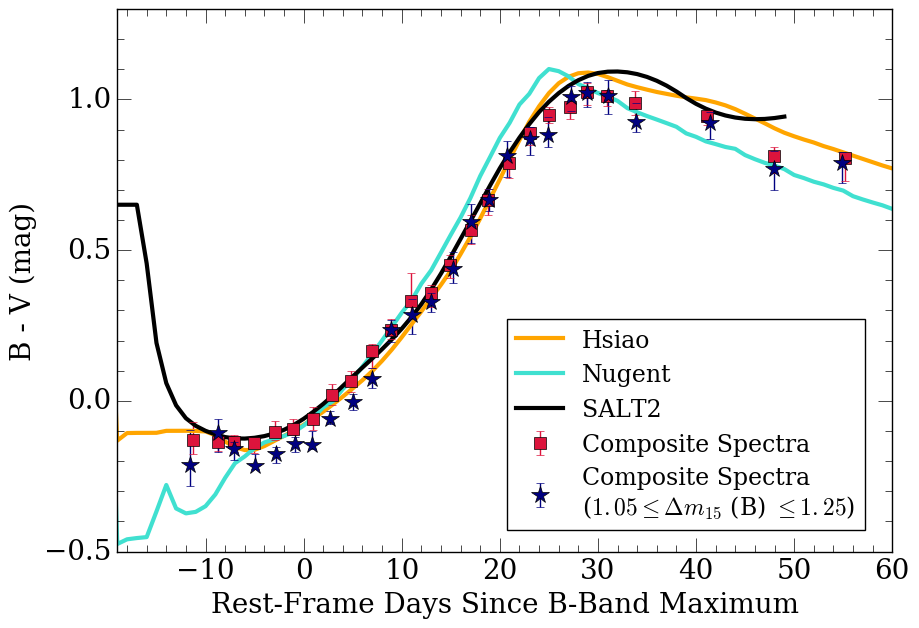

In [45]:
color_dict = {"Comp": "#000080", "Hsiao": "orange", "Nugent": "turquoise", "SALT-II": "black"}
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=5)
plt.xlabel('Rest-Frame Days Since B-Band Maximum', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.plot(phases_h, np.asarray(hsiao_B)-np.asarray(hsiao_V), color = color_dict['Hsiao'], label = 'Hsiao', linewidth=3)
plt.plot(phases_n, np.asarray(nug_B)-np.asarray(nug_V), color = color_dict['Nugent'], label = 'Nugent', linewidth=3)
plt.plot(phases_s, np.asarray(salt_B)-np.asarray(salt_V), color = color_dict['SALT-II'],label='SALT2', linewidth=3)
plt.errorbar(comp_phases, np.asarray(comp_B) - np.asarray(comp_V), yerr=errors, fmt='s', markersize=8, color = "crimson", label = 'Composite Spectra')
plt.errorbar(comp_phases_dm15, np.asarray(comp_B_dm15) - np.asarray(comp_V_dm15), yerr=errors_dm15, fmt='*', markersize=13, color = color_dict['Comp'], label = 'Composite Spectra \n($1.05 \leq \Delta m_{15}$ (B) $\leq 1.25$)')
plt.xlim([-19,60])
plt.ylim([-.5,1.3])
plt.legend(loc='best', bbox_to_anchor=(0.5, -0.05, 0.48, 0.5),numpoints=1, fontsize=17)
plt.savefig('../../../Paper_Drafts/template_comparisons_updated/color_curve.pdf', dpi = 300, bbox_inches = 'tight')
# plt.savefig('../../../FLASH/color_curve.png', dpi = 300, bbox_inches = 'tight')
print 'Last Run: '
print 'Comp B-V:', np.asarray(comp_B) - np.asarray(comp_V)
print 'Comp err: ', errors
print 'Comp B-V dm15: ', np.asarray(comp_B_dm15) - np.asarray(comp_V_dm15)
print 'Comp err: ', errors_dm15
plt.show()

## Foley08 Templates

In [33]:
wavelength_f08_m7, flux_f08_m7, low_f08_m7, up_f08_m7 = np.loadtxt('../data/foley/foley=0.01=-6.6=-0.08=0.37=47.flm', unpack = True)
wavelength_f08_0, flux_f08_0, low_f08_0, up_f08_0 = np.loadtxt('../data/foley/foley=0.01=-0.3=0.43=0.04=12.flm', unpack = True)
wavelength_f08_p6, flux_f08_p6, low_f08_p6, up_f08_p6 = np.loadtxt('../data/foley/foley=0.01=6.2=0.08=0.28=45.flm', unpack = True)
wavelength_f08_p14, flux_f08_p14, low_f08_p14, up_f08_p14 = np.loadtxt('../data/foley/foley=0.01=13.8=0.06=0.42=43.flm', unpack = True)
wavelength_f08_p19, flux_f08_p19, low_f08_p19, up_f08_p19 = np.loadtxt('../data/foley/foley=0.01=19.4=-0.02=0.59=26.flm', unpack = True)

In [34]:
#-1week
wave_interp_f08_m7 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_m7 = inter.splrep(wavelength_f08_m7, flux_f08_m7)
low_spl_f08_m7 = inter.splrep(wavelength_f08_m7, low_f08_m7)
up_spl_f08_m7 = inter.splrep(wavelength_f08_m7, up_f08_m7)

flux_interp_f08_m7 = inter.splev(wave_interp_f08_m7, flux_spl_f08_m7, ext = 3)
low_interp_f08_m7 = inter.splev(wave_interp_f08_m7, low_spl_f08_m7, ext = 3)
up_interp_f08_m7 = inter.splev(wave_interp_f08_m7, up_spl_f08_m7, ext = 3)

f08_template_m7 = composite.supernova(wave_interp_f08_m7, flux_interp_f08_m7, low_conf=low_interp_f08_m7, up_conf=up_interp_f08_m7)
f08_template_m7.phase_array = np.zeros(len(flux_interp_f08_m7))

#max
wave_interp_f08_0 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_0 = inter.splrep(wavelength_f08_0, flux_f08_0)
low_spl_f08_0 = inter.splrep(wavelength_f08_0, low_f08_0)
up_spl_f08_0 = inter.splrep(wavelength_f08_0, up_f08_0)

flux_interp_f08_0 = inter.splev(wave_interp_f08_0, flux_spl_f08_0, ext = 3)
low_interp_f08_0 = inter.splev(wave_interp_f08_0, low_spl_f08_0, ext = 3)
up_interp_f08_0 = inter.splev(wave_interp_f08_0, up_spl_f08_0, ext = 3)

f08_template_0 = composite.supernova(wave_interp_f08_0, flux_interp_f08_0, low_conf=low_interp_f08_0, up_conf=up_interp_f08_0)
f08_template_0.phase_array = np.zeros(len(flux_interp_f08_0))

#+1week
wave_interp_f08_p6 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_p6 = inter.splrep(wavelength_f08_p6, flux_f08_p6)
low_spl_f08_p6 = inter.splrep(wavelength_f08_p6, low_f08_p6)
up_spl_f08_p6 = inter.splrep(wavelength_f08_p6, up_f08_p6)

flux_interp_f08_p6 = inter.splev(wave_interp_f08_p6, flux_spl_f08_p6, ext = 3)
low_interp_f08_p6 = inter.splev(wave_interp_f08_p6, low_spl_f08_p6, ext = 3)
up_interp_f08_p6 = inter.splev(wave_interp_f08_p6, up_spl_f08_p6, ext = 3)

f08_template_p6 = composite.supernova(wave_interp_f08_p6, flux_interp_f08_p6, low_conf=low_interp_f08_p6, up_conf=up_interp_f08_p6)
f08_template_p6.phase_array = np.zeros(len(flux_interp_f08_m7))

#+2week
wave_interp_f08_p14 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_p14 = inter.splrep(wavelength_f08_p14, flux_f08_p14)
low_spl_f08_p14 = inter.splrep(wavelength_f08_p14, low_f08_p14)
up_spl_f08_p14 = inter.splrep(wavelength_f08_p14, up_f08_p14)

flux_interp_f08_p14 = inter.splev(wave_interp_f08_p14, flux_spl_f08_p14, ext = 3)
low_interp_f08_p14 = inter.splev(wave_interp_f08_p14, low_spl_f08_p14, ext = 3)
up_interp_f08_p14 = inter.splev(wave_interp_f08_p14, up_spl_f08_p14, ext = 3)

f08_template_p14 = composite.supernova(wave_interp_f08_p14, flux_interp_f08_p14, low_conf=low_interp_f08_p14, up_conf=up_interp_f08_p14)
f08_template_p14.phase_array = np.zeros(len(flux_interp_f08_p14))

#+19days
wave_interp_f08_p19 = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_f08_p19 = inter.splrep(wavelength_f08_p19, flux_f08_p19)
low_spl_f08_p19 = inter.splrep(wavelength_f08_p19, low_f08_p19)
up_spl_f08_p19 = inter.splrep(wavelength_f08_p19, up_f08_p19)

flux_interp_f08_p19 = inter.splev(wave_interp_f08_p19, flux_spl_f08_p19, ext = 3)
low_interp_f08_p19 = inter.splev(wave_interp_f08_p19, low_spl_f08_p19, ext = 3)
up_interp_f08_p19 = inter.splev(wave_interp_f08_p19, up_spl_f08_p19, ext = 3)

f08_template_p19 = composite.supernova(wave_interp_f08_p19, flux_interp_f08_p19, low_conf=low_interp_f08_p19, up_conf=up_interp_f08_p19)
f08_template_p19.phase_array = np.zeros(len(flux_interp_f08_p19))

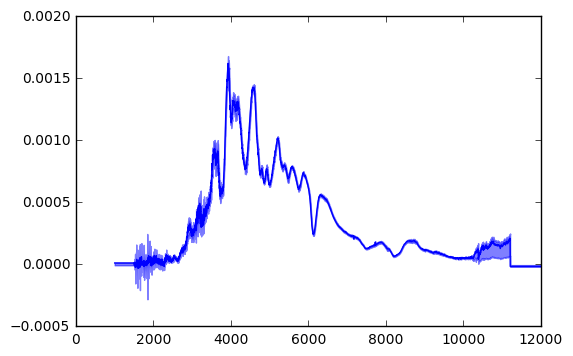

In [35]:
test_template = f08_template_p6
plt.plot(test_template.wavelength[test_template.x1:test_template.x2],test_template.flux[test_template.x1:test_template.x2])
plt.fill_between(test_template.wavelength[test_template.x1:test_template.x2],test_template.low_conf[test_template.x1:test_template.x2], test_template.up_conf[test_template.x1:test_template.x2], color='b',alpha=.5)
# plt.ylim([-1,12])
plt.show()

## Spectral feature comparison at various epochs

In [36]:
query_db.set_min_num_spec(composites, 5)
comps_and_temps = []
for comp in composites:
    comps_and_temps.append(comp)
srange = np.where((s_template.wavelength > 2000.) & (s_template.wavelength < 9200))[0]
s_template.x1 = srange[0]
s_template.x2 = srange[-1]
comps_and_temps.append(h_template)
comps_and_temps.append(f08_template_0)
comps_and_temps.append(n_template)
comps_and_temps.append(s_template)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[2], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Foley08"
comps_and_temps[4].name = "Nugent"
comps_and_temps[5].name = "SALT2"
# for comp in comps_and_temps:
#     v_strong, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900., 6300.)
#     print comp.name, 'v = ', v_strong
#     r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp = .002, plot=False)
#     print comp.name, 'r = ', r
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2]],include_spec_bin=True, legend_labels = ["Composite Spectrum", "Hsiao",])

1.14016388063
1.11806333894


In [71]:
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2]], include_spec_bin=True, legend_labels = ["Composite Spectrum \n($ 1.02 < \Delta m_{15} (B) < 1.24$)", "Hsiao",])

Phase:  0.063209892803
dm15:  1.14016388063
Redshift:  0.0141891840496


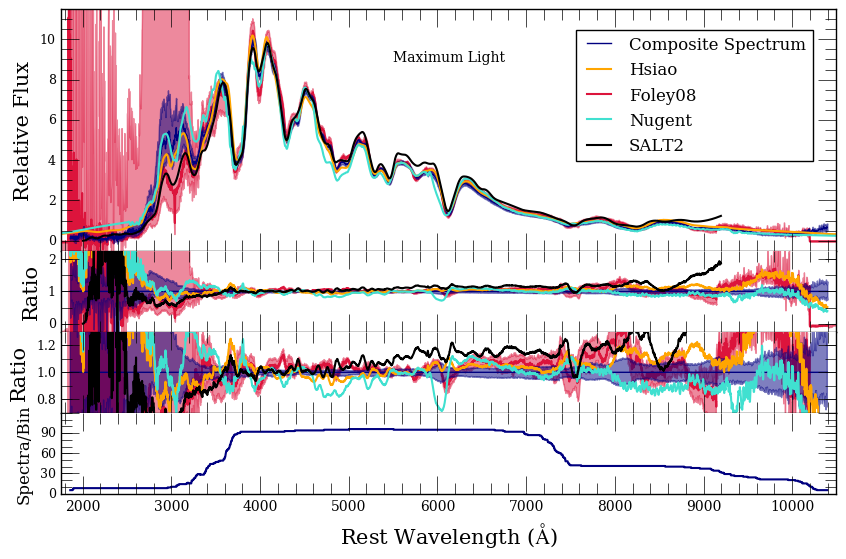

In [72]:
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], 
                     include_spec_bin=True, legend_labels = ["Composite Spectrum", "Hsiao", "Foley08","Nugent","SALT2"], 
                     rm_last_label=True, text='Maximum Light', savename = 'template_comparisons_updated/temp_max_light_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], 
#                      include_spec_bin=True, legend_labels = ["Composite Spectrum", "Hsiao", "Foley+08","Nugent","SALT2"], 
#                      rm_last_label=True, text='Maximum Light')

Phase:  0.0851584036609
dm15:  1.11806333894
Redshift:  0.0127072846345


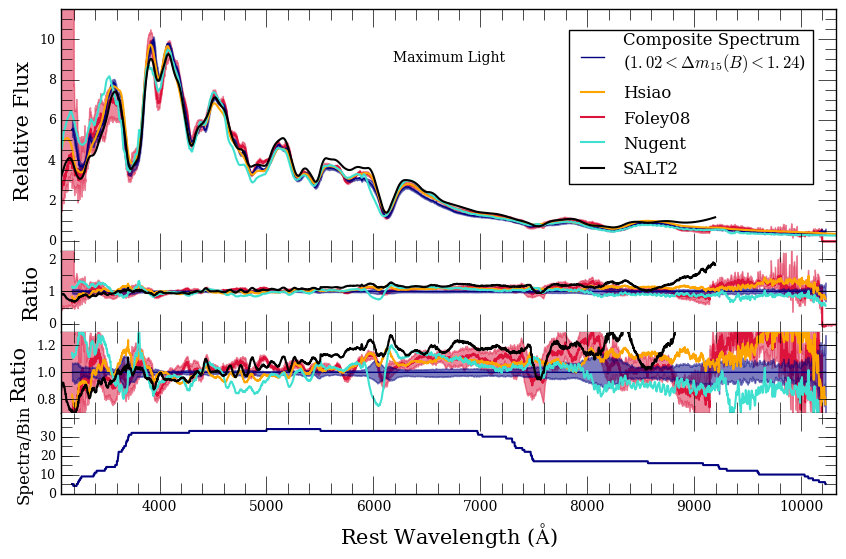

In [73]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], 
                     include_spec_bin=True, rm_last_label=True, legend_labels = ["Composite Spectrum \n($ 1.02 < \Delta m_{15} (B) < 1.24$)", "Hsiao","Foley08", "Nugent","SALT2"], 
                     text='Maximum Light',savename = 'template_comparisons_updated/temp_max_light_dm15')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], 
#                      include_spec_bin=True, rm_last_label=True, legend_labels = ["Composite Spectrum \n($ 1.02 < \Delta m_{15} (B) < 1.24$)", "Hsiao","Foley08", "Nugent","SALT2"], 
#                      text='Maximum Light')

Phase:  0.063209892803
dm15:  1.14016388063
Redshift:  0.0141891840496
Phase:  0.0851584036609
dm15:  1.11806333894
Redshift:  0.0127072846345


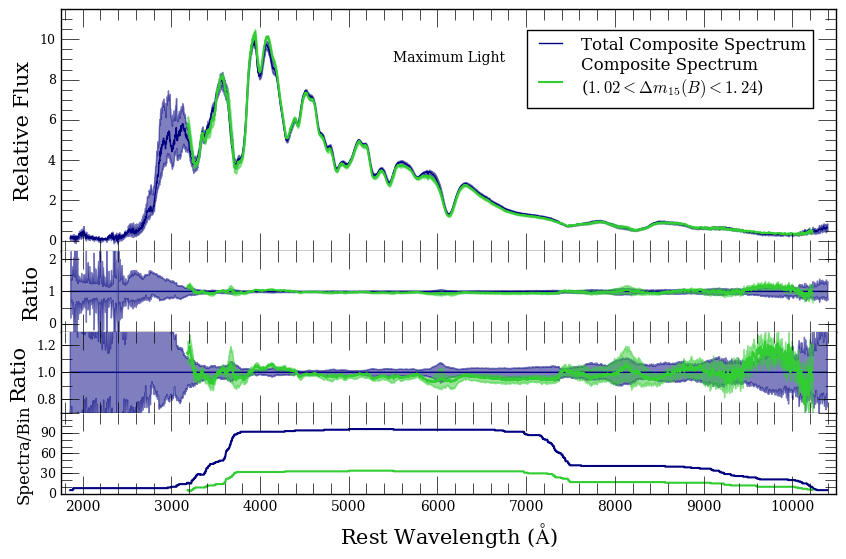

In [74]:
comps_and_temps[1].name = "Comp2"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], include_spec_bin=True, rm_last_label=True, 
                     legend_labels = ["Total Composite Spectrum","Composite Spectrum \n($ 1.02 < \Delta m_{15} (B) < 1.24$)"],
                     text ='Maximum Light', savename = 'template_comparisons_updated/max_light_total_bin_comp')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], include_spec_bin=True, rm_last_label=True, 
#                      legend_labels = ["Total Composite Spectrum","Composite Spectrum \n($ 1.02 < \Delta m_{15} (B) < 1.24$)"],
#                      text ='Maximum Light')

In [55]:
wave_h_1week = []
flux_h_1week = []
for i, phase in enumerate(phase_h):
    if float(phase) == 7.0:
        wave_h_1week.append(wavelength_hsiao[i])
        flux_h_1week.append(flux_hsiao[i])

In [56]:
wave_interp_h_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_1week = inter.splrep(wave_h_1week, flux_h_1week)
flux_interp_h_1week = inter.splev(wave_interp_h_1week, flux_spl_h_1week, ext = 3)
h_template_1week = composite.supernova(wave_interp_h_1week, flux_interp_h_1week)
h_template_1week.phase_array = np.zeros(len(flux_interp_h_1week))

In [57]:
wave_n_1week = []
flux_n_1week = []
for i, phase in enumerate(epoch_n):
    if float(phase) == 27.0:
        wave_n_1week.append(wavelength_nugent[i])
        flux_n_1week.append(flux_nugent[i])

In [58]:
wave_interp_n_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_1week = inter.splrep(wave_n_1week, flux_n_1week)
flux_interp_n_1week = inter.splev(wave_interp_n_1week, flux_spl_n_1week, ext = 3)
n_template_1week = composite.supernova(wave_interp_n_1week,flux_interp_n_1week)
n_template_1week.phase_array = np.zeros(len(flux_interp_n_1week))

In [59]:
wave_s_1week = []
flux_s_1week = []
for i, phase in enumerate(phase_s):
    if float(phase) == 7.0:
        wave_s_1week.append(wavelength_salt[i])
        flux_s_1week.append(flux_salt[i])

In [60]:
wave_interp_s_1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s_1week = inter.splrep(wave_s_1week, flux_s_1week)
flux_interp_s_1week = inter.splev(wave_interp_s_1week, flux_spl_s_1week, ext = 3)
s_template_1week = composite.supernova(wave_interp_s_1week,flux_interp_s_1week)
s_template_1week.phase_array = np.zeros(len(flux_interp_s_1week))

In [77]:
query_1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 6 and phase < 8",
         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 6 and phase <= 8 and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.25)) and Supernovae.SN !='2002bf'"]

In [78]:
composites_1week, sn_arrays_1week, boot_sn_arrays_1week = query_db.main(len(query_1week), query_1week, boot='b', medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 6 and phase < 8
173 questionable files currently ignored
(21, 'questionable spectra removed', 176, 'spectra left')
(3, 'Peculiar Ias removed', 173, 'spectra left')
139 spectra with host corrections
173 questionable files currently ignored
98 valid SNe found
Arrays cleaned
3 spectra may have telluric contamination
98 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 32 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 6 and phase <= 8 and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.25)) and Supernovae.SN !='2002bf'
173 questionable files currently ignored
(8, 'questionable spectra removed', 43, 'spectra left')
(0, 'Peculiar Ias removed', 43, 'spectra left')
42 spectra

1.16503075594
1.1341734006
Phase:  6.91969895515
dm15:  1.16425115118
Redshift:  0.0148389548702


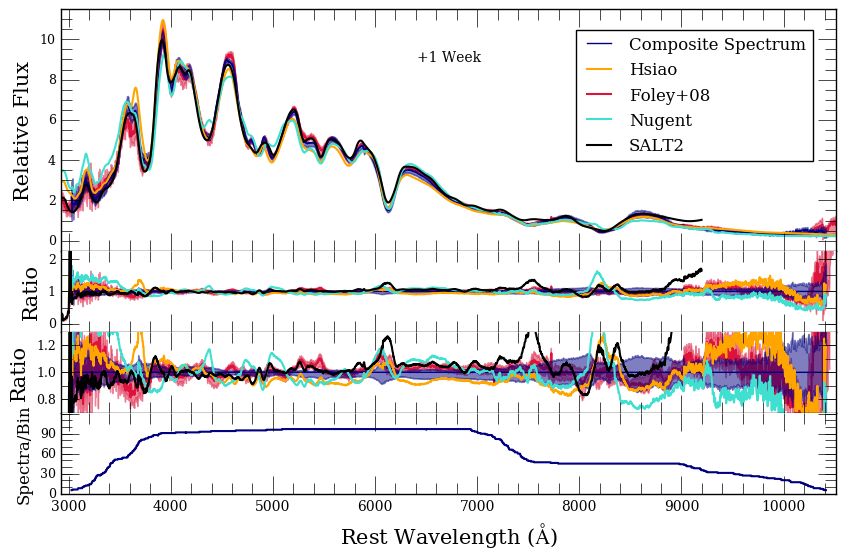

In [79]:
query_db.set_min_num_spec(composites_1week, 5)

comps_and_temps = []
for comp in composites_1week:
    comps_and_temps.append(comp)

srange = np.where((s_template_1week.wavelength > 2000.) & (s_template_1week.wavelength < 9200))[0]
s_template_1week.x1 = srange[0]
s_template_1week.x2 = srange[-1]

comps_and_temps.append(h_template_1week)
comps_and_temps.append(f08_template_p6)
comps_and_temps.append(n_template_1week)
comps_and_temps.append(s_template_1week)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Foley08"
comps_and_temps[4].name = "Nugent"
comps_and_temps[5].name = "SALT2"
# for comp in comps_and_temps:
#     v_strong, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900., 6300.)
#     print comp.name, 'v = ', v_strong, si_min_wave
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
                     legend_labels = ["Composite Spectrum", "Hsiao", "Foley+08","Nugent","SALT2"], text='+1 Week', rm_last_label=True, zoom=True,
                     savename = 'template_comparisons_updated/temp_p7_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["Composite Spectrum", "Hsiao", "Foley08","Nugent","SALT2"], text='+1 Week', rm_last_label=True, zoom=True,
#                      )
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"])

Phase:  6.96362976668
dm15:  1.1341734006
Redshift:  0.0139454863952


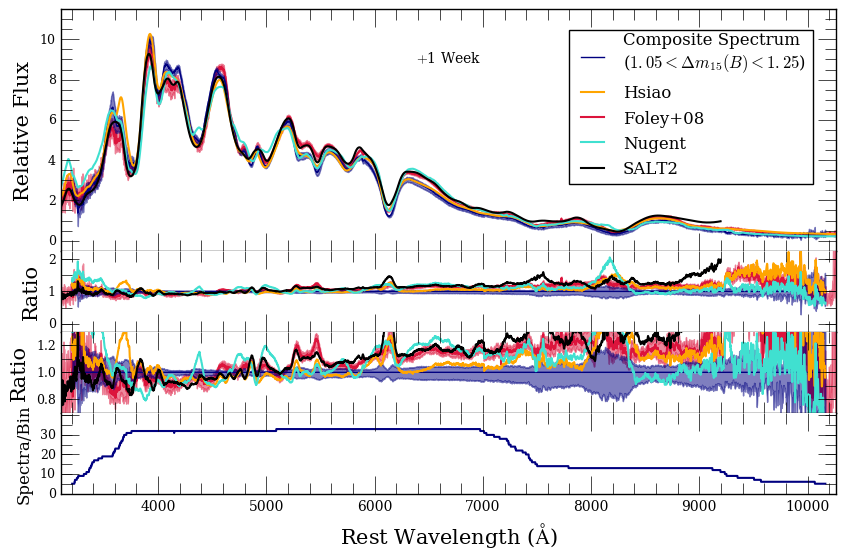

In [82]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
                     legend_labels = ["Composite Spectrum \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Foley+08","Nugent","SALT2"],
                     rm_last_label=True, text='$+$1 Week',
                     savename = 'template_comparisons_updated/temp_p7_dm15')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
#                      legend_labels = ["Composite Spectrum \n($ 1.0 < \Delta m_{15} (B) < 1.2$)", "Hsiao", "Foley08","Nugent","SALT2"],
#                      rm_last_label=True, text='$+$1 Week')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum \n($ 1.0 < \Delta m_{15} (B) < 1.2$)", "Hsiao", "Nugent","SALT2"])

In [57]:
wave_h_m1week = []
flux_h_m1week = []
for i, phase in enumerate(phase_h):
    if float(phase) == -7.0:
        wave_h_m1week.append(wavelength_hsiao[i])
        flux_h_m1week.append(flux_hsiao[i])

In [58]:
wave_interp_h_m1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_m1week = inter.splrep(wave_h_m1week, flux_h_m1week)
flux_interp_h_m1week = inter.splev(wave_interp_h_m1week, flux_spl_h_m1week, ext = 3)
h_template_m1week = composite.supernova(wave_interp_h_m1week, flux_interp_h_m1week)
h_template_m1week.phase_array = np.zeros(len(flux_interp_h_m1week))

In [59]:
wave_n_m1week = []
flux_n_m1week = []
for i, phase in enumerate(epoch_n):
    if float(phase) == 13.0:
        wave_n_m1week.append(wavelength_nugent[i])
        flux_n_m1week.append(flux_nugent[i])

In [60]:
wave_interp_n_m1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_m1week = inter.splrep(wave_n_m1week, flux_n_m1week)
flux_interp_n_m1week = inter.splev(wave_interp_n_m1week, flux_spl_n_m1week, ext = 3)
n_template_m1week = composite.supernova(wave_interp_n_m1week, flux_interp_n_m1week)
n_template_m1week.phase_array = np.zeros(len(flux_interp_n_m1week))

In [61]:
wave_s_m1week = []
flux_s_m1week = []
for i, phase in enumerate(phase_s):
    if float(phase) == -7.0:
        wave_s_m1week.append(wavelength_salt[i])
        flux_s_m1week.append(flux_salt[i])

In [62]:
wave_interp_s_m1week = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s_m1week = inter.splrep(wave_s_m1week, flux_s_m1week)
flux_interp_s_m1week = inter.splev(wave_interp_s_m1week, flux_spl_s_m1week, ext = 3)
s_template_m1week = composite.supernova(wave_interp_s_m1week, flux_interp_s_m1week)
s_template_m1week.phase_array = np.zeros(len(flux_interp_s_m1week))

In [51]:
query_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -8 and phase < -6",
         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -8 and phase <= -6 and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.25))"]

In [52]:
composites_m1week, sn_arrays_m1week, boot_sn_arrays_m1week = query_db.main(len(query_m1week), query_m1week, boot='b', medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -8 and phase < -6
173 questionable files currently ignored
Generate variance failed for:  [u'sn2005cf-20050605-hst.flm', u'sn2005m-20050128-hst.flm']
(10, 'questionable spectra removed', 150, 'spectra left')
(2, 'Peculiar Ias removed', 148, 'spectra left')
108 spectra with host corrections
173 questionable files currently ignored
67 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
67 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 14 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -8 and phase <= -6 and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.25))
173 questionable files currently ignored
Generate variance failed for:  [u'sn2005cf-20050

dm15:
1.11224728584
1.13036597419
phase:
-7.11256715514
-7.0850008129
Phase:  -7.10858389265
dm15:  1.09446166531
Redshift:  0.011223978861


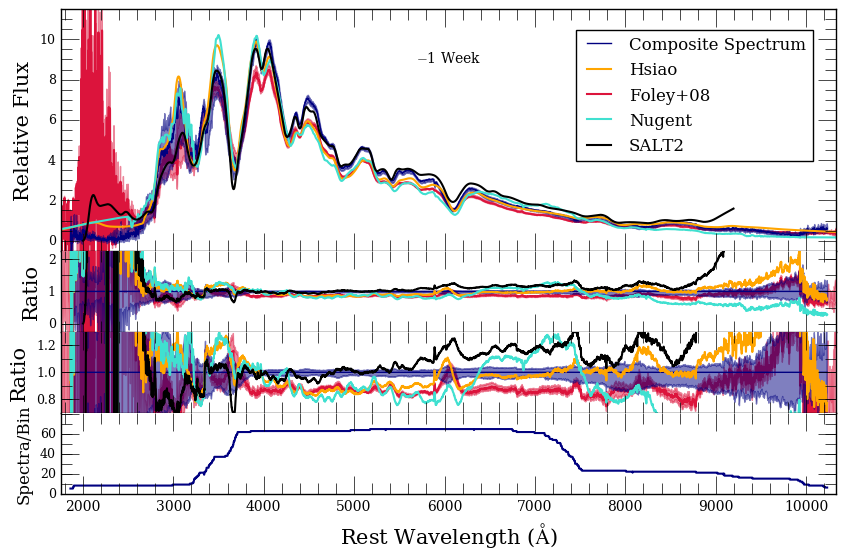

In [63]:
query_db.set_min_num_spec(composites_m1week, 5)
comps_and_temps = []
for comp in composites_m1week:
    comps_and_temps.append(comp)
    
srange = np.where((s_template_m1week.wavelength > 2000.) & (s_template_m1week.wavelength < 9200))[0]
s_template_m1week.x1 = srange[0]
s_template_m1week.x2 = srange[-1]

comps_and_temps.append(h_template_m1week)
comps_and_temps.append(f08_template_m7)
comps_and_temps.append(n_template_m1week)
comps_and_temps.append(s_template_m1week)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

print 'dm15:'
print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print 'phase:'
print np.average(comps_and_temps[0].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Foley08"
comps_and_temps[4].name = "Nugent"
comps_and_temps[5].name = "SALT2"
# for comp in comps_and_temps:
#     v_strong, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900., 6300.)
#     print comp.name, 'v = ', v_strong
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
                     legend_labels = ["Composite Spectrum", "Hsiao", "Foley+08", "Nugent","SALT2"], 
                     rm_last_label=True, text='$-$1 Week',
                     savename = 'template_comparisons_updated/temp_m7_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"])

Phase:  -7.0850008129
dm15:  1.13036597419
Redshift:  0.00984742327209


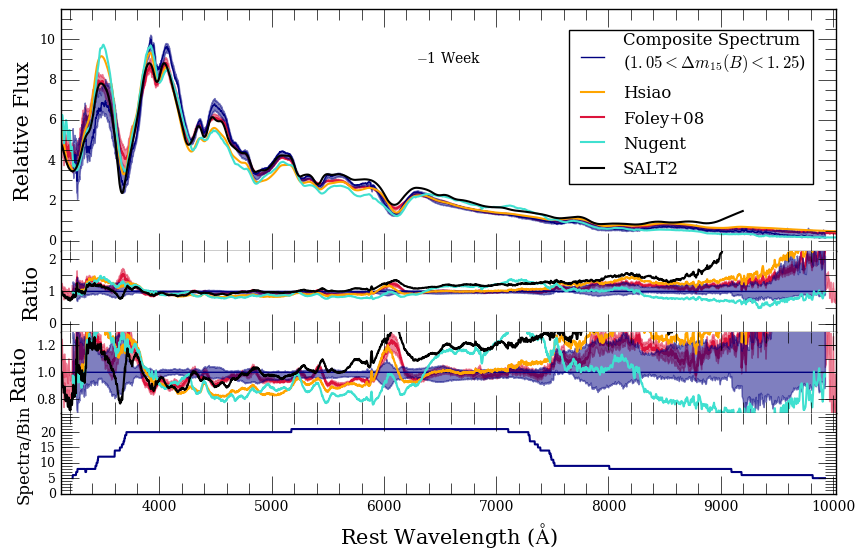

In [64]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4], comps_and_temps[5]], include_spec_bin=True, 
                     legend_labels = ["Composite Spectrum \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Foley+08","Nugent","SALT2"], 
                     rm_last_label=True, text='$-$1 Week',
                     savename = 'template_comparisons_updated/temp_m7_dm15')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum \n($ 0.98 < \Delta m_{15} (B) < 1.18$)", "Hsiao", "Nugent","SALT2"])

In [37]:
wave_h_1month = []
flux_h_1month = []
for i, phase in enumerate(phase_h):
    if float(phase) == 30.0:
        wave_h_1month.append(wavelength_hsiao[i])
        flux_h_1month.append(flux_hsiao[i])

In [38]:
wave_interp_h_1month = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h_1month = inter.splrep(wave_h_1month, flux_h_1month)
flux_interp_h_1month = inter.splev(wave_interp_h_1month, flux_spl_h_1month, ext = 3)
h_template_1month = composite.supernova(wave_interp_h_1month, flux_interp_h_1month)
h_template_1month.phase_array = np.zeros(len(flux_interp_h_1month))

In [39]:
wave_n_1month = []
flux_n_1month = []
for i, phase in enumerate(epoch_n):
    if float(phase) == 50.0:
        wave_n_1month.append(wavelength_nugent[i])
        flux_n_1month.append(flux_nugent[i])

In [40]:
wave_interp_n_1month = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_n_1month = inter.splrep(wave_n_1month, flux_n_1month)
flux_interp_n_1month = inter.splev(wave_interp_n_1month, flux_spl_n_1month, ext = 3)
n_template_1month = composite.supernova(wave_interp_n_1month, flux_interp_n_1month)
n_template_1month.phase_array = np.zeros(len(flux_interp_n_1month))

In [41]:
wave_s_1month = []
flux_s_1month = []
for i, phase in enumerate(phase_s):
    if float(phase) == 30.0:
        wave_s_1month.append(wavelength_salt[i])
        flux_s_1month.append(flux_salt[i])

In [42]:
wave_interp_s_1month = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_s_1month = inter.splrep(wave_s_1month, flux_s_1month)
flux_interp_s_1month = inter.splev(wave_interp_s_1month, flux_spl_s_1month, ext = 3)
s_template_1month = composite.supernova(wave_interp_s_1month, flux_interp_s_1month)
s_template_1month.phase_array = np.zeros(len(flux_interp_s_1month))

In [47]:
query_1month = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 28 and phase < 32",
         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 28 and phase <= 32 and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.25)) and Supernovae.SN !='2002bf'"]

In [48]:
composites_1month, sn_arrays_1month, boot_sn_arrays_tmonth = query_db.main(len(query_1month), query_1month, boot='b', medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 28 and phase < 32
ERROR:  2002bo_20020421_0_2_00.dat None
173 questionable files currently ignored
(9, 'questionable spectra removed', 145, 'spectra left')
(4, 'Peculiar Ias removed', 141, 'spectra left')
120 spectra with host corrections
173 questionable files currently ignored
87 valid SNe found
Arrays cleaned
4 spectra may have telluric contamination
87 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 25 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 28 and phase <= 32 and ((dm15_source >= 1.05 and dm15_source < 1.25) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.25)) and Supernovae.SN !='2002bf'
ERROR:  2002bo_20020421_0_2_00.dat None
173 questionable files currently ignored
(7, 'questionable spectra remov

dm15:
1.15060140901
1.13629644604
phase:
29.6522976853
29.7189010517
Phase:  29.6631709359
dm15:  1.14831659092
Redshift:  0.0142225364749


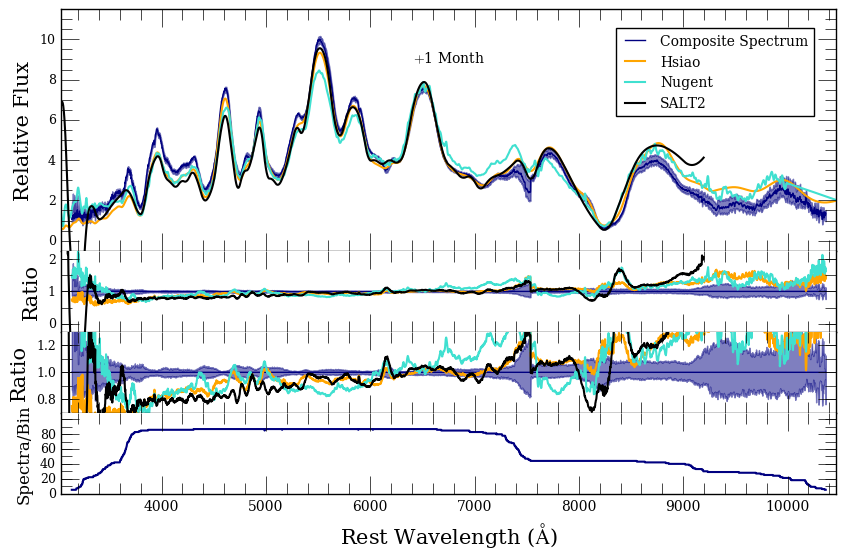

In [49]:
query_db.set_min_num_spec(composites_1month, 5)
comps_and_temps = []
for comp in composites_1month:
    comps_and_temps.append(comp)

srange = np.where((s_template_1month.wavelength > 2000.) & (s_template_1month.wavelength < 9200))[0]
s_template_1month.x1 = srange[0]
s_template_1month.x2 = srange[-1]

comps_and_temps.append(h_template_1month)
comps_and_temps.append(n_template_1month)
comps_and_temps.append(s_template_1month)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

print 'dm15:'
print np.average(comps_and_temps[0].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].dm15_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print 'phase:'
print np.average(comps_and_temps[0].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
print np.average(comps_and_temps[1].phase_array[comps_and_temps[1].x1:comps_and_temps[1].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Comp"
comps_and_temps[2].name = "Hsiao"
comps_and_temps[3].name = "Nugent"
comps_and_temps[4].name = "SALT2"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
                     legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"], text='$+$1 Month',
                     rm_last_label=True,
                     savename = 'template_comparisons_updated/temp_p30_all')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum", "Hsiao", "Nugent","SALT2"])

Phase:  29.7189010517
dm15:  1.13629644604
Redshift:  0.0125854978149


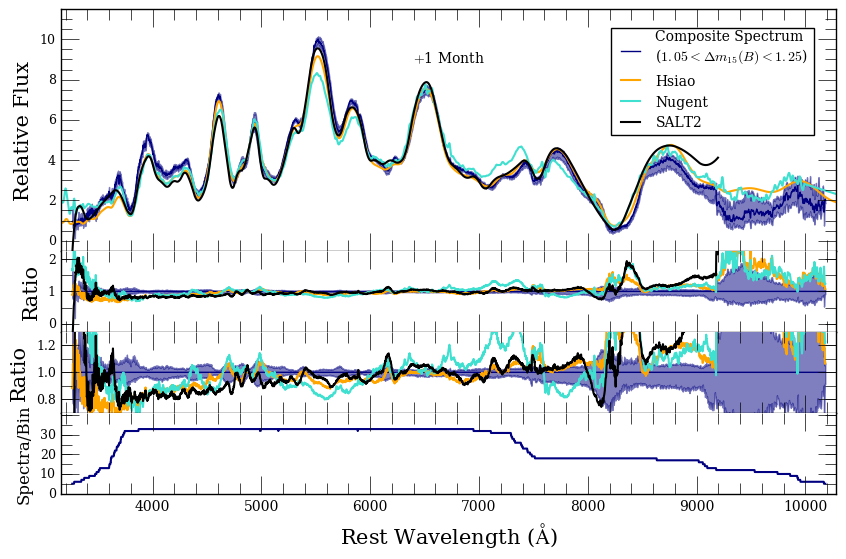

In [50]:
query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], include_spec_bin=True, 
                     legend_labels = ["Composite Spectrum \n($ 1.05 < \Delta m_{15} (B) < 1.25$)", "Hsiao", "Nugent","SALT2"], 
                     rm_last_label=True, text='$+$1 Month',
                     savename = 'template_comparisons_updated/temp_p30_dm15')
# query_db.scaled_plot([comps_and_temps[1], comps_and_temps[2], comps_and_temps[3], comps_and_temps[4]], legend_labels = ["Composite Spectrum \n($ 0.95 < \Delta m_{15} (B) < 1.15$)", "Hsiao", "Nugent","SALT2"])

## 91t and 91bg nugent maximum light comparisons

In [214]:
query_91t = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source <= .9) or (dm15_from_fits <= .9)) and Supernovae.SN !='2002bf'"]

In [215]:
composites_91t, sn_arrays_91t, boot_sn_arrays_91t = query_db.main(len(query_91t), query_91t, boot='b', medmean=1, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source <= .9) or (dm15_from_fits <= .9)) and Supernovae.SN !='2002bf'
172 questionable files currently ignored
(0, 'questionable spectra removed', 23, 'spectra left')
(0, 'Peculiar Ias removed', 23, 'spectra left')
23 spectra with host corrections
172 questionable files currently ignored
15 valid SNe found
Arrays cleaned
0 spectra may have telluric contamination
15 SNs with host corrections
Creating composite...
Done.
Bootstrapping
scaling boots...
computing confidence intervals...


In [81]:
query_db.set_min_num_spec(composites_91t, 5)

0.843894858993


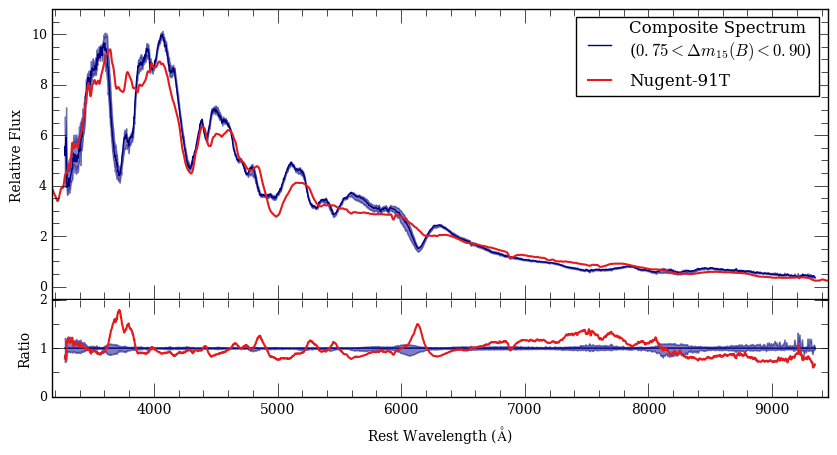

In [82]:
comps_and_temps = []
for comp in composites_91t:
    comps_and_temps.append(comp)
comps_and_temps.append(n_template_91t)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[1], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Nugent"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], legend_labels = ["Composite Spectrum \n($ 0.75 < \Delta m_{15} (B) < 0.90$)", "Nugent-91T"])

In [65]:
query_91bg = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.8) or (dm15_from_fits >= 1.8)) and Supernovae.SN !='2002bf'"]

In [66]:
composites_91bg, sn_arrays_91bg, boot_sn_arrays_91bg = query_db.main(len(query_91bg), query_91bg, boot='b', medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.8) or (dm15_from_fits >= 1.8)) and Supernovae.SN !='2002bf'
173 questionable files currently ignored
(6, 'questionable spectra removed', 29, 'spectra left')
(1, 'Peculiar Ias removed', 28, 'spectra left')
23 spectra with host corrections
173 questionable files currently ignored
10 valid SNe found
Arrays cleaned
0 spectra may have telluric contamination
10 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 3 iterations
Done.
Bootstrapping


composite.py:1027: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  template.low_conf, template.up_conf, boots = \


scaling boots...
computing confidence intervals...


1.8949370496
Phase:  -0.125726590315
dm15:  1.8949370496
Redshift:  0.0100912520163


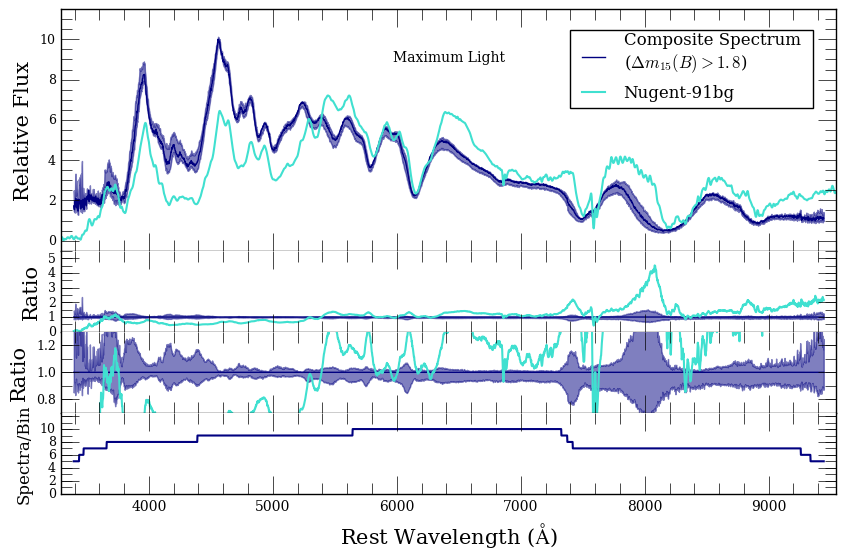

In [67]:
query_db.set_min_num_spec(composites_91bg, 5)
comps_and_temps = []
for comp in composites_91bg:
    comps_and_temps.append(comp)
comps_and_temps.append(n_template_91bg)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[1], True)

print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
comps_and_temps[0].name = "Comp"
comps_and_temps[1].name = "Nugent"
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], include_spec_bin=True, 
                     legend_labels = ["Composite Spectrum \n($\Delta m_{15} (B) > 1.8$)", "Nugent-91bg"], 
                     rm_last_label=True, expand_ratio=True, text='Maximum Light',
                     savename = 'template_comparisons_updated/temp_max_light_91bg')
# query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]], legend_labels = ["Composite Spectrum \n($\Delta m_{15} (B) > 1.8$)", "Nugent-91bg"])